# Data C200 Final Project

This is the Jupyter Notebook file of Data C200. Data in the `data` folder.

## Step 0 : Module and Data Import

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#import geopandas as gpd # For geometry data precessing
#import geoplot as gplt # For mapping projections onto US map
#import geoplot.crs as gcrs # coordinate reference system

import folium
import folium.plugins # The Folium Javascript Map Library

import os 
import re

%matplotlib inline

pd.set_option('display.max_rows', 20)

In [2]:
drd_filename = os.path.join('data', 'Accidental_Drug_Related_Deaths_2012-2018.csv')

drug_related_deaths = pd.read_csv(drd_filename)
drug_related_deaths.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [3]:
mnc_filename = os.path.join('data', 'mnc_ct.csv')

mnc_ct = pd.read_csv(mnc_filename)
mnc_ct.head()

,Number,Town,Designation,Dateestablished,Land area(square miles),Population(in 2010),Form ofgovernment,County,Council of Governments,Native Americanname
0,1,Andover,Town,1848,15.46,"3,303",Town meeting,Tolland County,Capitol Region,NaN
1,2,Ansonia,City,1889,6.03,"19,249",Mayor-council,New Haven County,Naugatuck Valley,NaN
2,3,Ashford,Town,1714,38.79,"4,100",Town meeting,Windham County,Northeast CT,NaN
3,4,Avon,Town,1830,23.12,"18,098",Council-manager,Hartford County,Capitol Region,NaN
4,5,Barkhamsted,Town,1779,36.22,"3,620",Town meeting,Litchfield County,Northwest Hills,NaN


In [4]:
cdp_filename = os.path.join('data', 'cdp_ct.csv')

cdp_ct = pd.read_csv(cdp_filename)
cdp_ct.head()

,CDP,Population,County
0,Baltic,"1,250",New London
1,Bethel,"9,549",Fairfield
2,Bethlehem Village,"2,021",Litchfield
3,Blue Hills,"2,901",Hartford
4,Branford Center,"5,819",New Haven


In [5]:
br_filename = os.path.join('data', 'borough_ct.csv')

br_ct = pd.read_csv(br_filename)
br_ct.head()

,Borough,Parent town,Date incorporated,Current status
0,Bridgeport,Stratford,1800,Consolidated city-town separate from original ...
1,Stonington,Stonington,1801,Borough
2,Guilford,Guilford,1815,Disincorporated 1941
3,Essex,Deep River (Saybrook),1820,Disincorporated 1854 when Town of Essex was in...
4,Killingworth (Clinton),Killingworth,1820,Disincorporated 1838 when Town of Clinton was ...


In [6]:
ea_filename = os.path.join('data', 'educationalattainment2019.csv')

ea_ct = pd.read_csv(ea_filename)
ea_ct.head()

,Town,FIPS,Year,Gender,Educational Attainment,Measure Type,Variable,Value
0,Andover,901301080,2006-2010,Female,Associate's Degree,Number,Educational Attainment,142.00
1,Andover,901301080,2006-2010,Female,Associate's Degree,Number,Margins of Error,69.00
2,Andover,901301080,2006-2010,Female,Associate's Degree,Percent,Educational Attainment,11.74
3,Andover,901301080,2006-2010,Female,Associate's Degree,Percent,Margins of Error,5.75
4,Andover,901301080,2006-2010,Female,Bachelor's Degree or higher,Number,Educational Attainment,443.00


In [7]:
ri_filename = os.path.join('data', 'population-by-race-by-county-2019.csv')

ri_ct = pd.read_csv(ri_filename)
ri_ct.head()

,County,FIPS,Year,Race/Ethnicity,Measure Type,Variable,Value
0,Connecticut,9,2006-2010,American Indian and Alaska Native Alone,Number,Population,5654.0
1,Connecticut,9,2006-2010,American Indian and Alaska Native Alone,Number,Margins of Error,528.0
2,Connecticut,9,2006-2010,American Indian and Alaska Native Alone,Percent,Population,0.2
3,Connecticut,9,2006-2010,American Indian and Alaska Native Alone,Percent,Margins of Error,-9999.0
4,Connecticut,9,2006-2010,Asian Alone,Number,Population,128884.0


In [8]:
ib_filename = os.path.join('data', 'median-household-income-county-2019.csv')

ib_ct = pd.read_csv(ib_filename)
ib_ct.head()

,County,FIPS,Year,Race/Ethnicity,Measure Type,Variable,Value
0,Connecticut,9,2005-2009,All,Number,Median Household Income,67721.00
1,Connecticut,9,2005-2009,All,Number,Margins of Error,389.00
2,Connecticut,9,2005-2009,All,Ratio to State Median,Median Household Income,1.00
3,Connecticut,9,2005-2009,All,Ratio to State Median,Margins of Error,0.01
4,Connecticut,9,2005-2009,American Indian and Alaska Native Alone,Number,Median Household Income,45615.00


## Step 1 : Exploratory Data Analysis (EDA)

### Main Dataset : [drug related deaths](https://www.kaggle.com/muhakabartay/accidental-drug-related-deaths-20122018) (_drd for short_)

In [9]:
drug_related_deaths.describe()

,Age
count,5102.000000
mean,41.964916
std,12.336639
min,14.000000
25%,32.000000
50%,42.000000
75%,52.000000
max,87.000000


In [10]:
# Basic information
drug_related_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5105 non-null   object 
 1   Date                 5103 non-null   object 
 2   DateType             5103 non-null   object 
 3   Age                  5102 non-null   float64
 4   Sex                  5099 non-null   object 
 5   Race                 5092 non-null   object 
 6   ResidenceCity        4932 non-null   object 
 7   ResidenceCounty      4308 non-null   object 
 8   ResidenceState       3556 non-null   object 
 9   DeathCity            5100 non-null   object 
 10  DeathCounty          4005 non-null   object 
 11  Location             5081 non-null   object 
 12  LocationifOther      590 non-null    object 
 13  DescriptionofInjury  4325 non-null   object 
 14  InjuryPlace          5039 non-null   object 
 15  InjuryCity           3349 non-null   o

#### Observational EDA for `drug_related_death` DataFrame

1. **File formats and structure**: csv file (rectangular table), 41 columns in total

_Can we divide the 41 columns into different sets (packages) ?_

Yes. It can be divided as followed: 

* Basic information (e.g. age, sex, race, date of death)
* Residence location (city, county, state, and geometry/coordinate) - This would be main focus of data cleaning, such as joining this table with another table (from a different dataset) containing Connecticut city information.
* Death location (city, county, and geometry/coordinate) - This excludes all `state` information because **this dataset only focuses on drug related death in Connecticut**.
* Injury location (city, county, state, and geometry/coordinate) 
* Drug classification (e.g. opioids such like methadone, heroin and fentanyl, alcohol and others)
    
2. **Granularity**: Each reported individual with drug abuse related deaths in Connecticut

3. **Scope**: 

_Does my data cover my area of interest?_

Not entirely. We have some missing values on states and these need to be filled by joining tables.

_Is our dataset too expansive?_

This dataset is expansive in the way that it only covers drug related deaths data rather than all drug use data, which may contribute to misleading conclusions about drug use in general.

_Does our data have the correct time frames?_

Since all data entries are from Connecticut, the time frames will be Eastern Time (UTC-5:00) by default. Therefore, the time frame is uniform.

4. **Temporality**: Time of the day is not reliable in this dataset, since all values of time of the day are set as `12:00:00 AM` for convinience. For timestamps, the main focus would be the date, which is reliable in this dataset.

5. **Faithfulness and Missing Values**: The faithfulness can be further explored by our data cleaning. Missing values are obvious in several columns (especially states) for brute simplicity. Whenever possible, we will try to hypothesize reasons for the existence of certain null values in our dataset (such as for time of death or for city).

    * _Update_ : Some of the missing values that would be problematic for our analysis:
        * County names and state names : many data entries only have city names with non-null values, counties and states remain null. This has to be solved in a way not to destroy some subset of people in our population of interest, but excluded by NaN values from our sampling frame.
        * Geometries : we would like to utilize geometry information in our data analysis. Null values cannot be used in map projections.

#### About location null values

We can notice that many missing values are in location columns (i.e. Residence/Death/Injury locations). In these locations, we put our focus on `DeathCity` column for the following two reasons:

1. **Why death location?** Since this dataset have all entries of drug-related deaths in the State of Connecticut, the location of death reported must be within Connecticut, without cities or towns from other states in America. Hence, the list of cities or towns (i.e. municipalities) in Connecticut can be utilized.

2. **Why death cities?** Between both of the columns `DeathCity` and `DeathCounty`, `DeathCity` has the biggest number of non-null values.

In [11]:
drug_related_deaths['DeathCity'].unique()

array([nan, 'NORWALK', 'DANBURY', 'GREENWICH', 'BRISTOL', 'WEST HARTFORD',
       'NEW HAVEN', 'EAST HARTFORD', 'MONTVILLE', 'STRATFORD', 'HARTFORD',
       'WALLINGFORD', 'MIDDLETOWN', 'WINDHAM', 'BRIDGEPORT', 'DERBY',
       'COS COB', 'MERIDEN', 'ENFIELD', 'TORRINGTON', 'WATERBURY',
       'MASHANTUCKET', 'MILFORD', 'SOMERS', 'STAMFORD', 'NEW BRITAIN',
       'WILLIMANTIC', 'WATERTOWN', 'BALTIC', 'RIDGEFIELD', 'NEW LONDON',
       'BROOKFIELD', 'SHELTON', 'NORWICH', 'NAUGATUCK', 'VERNON',
       'FAIRFIELD', 'EAST HAMPTON', 'SHARON', 'MONROE', 'WINCHESTER',
       'BRANFORD', 'MANCHESTER', 'WOLCOTT', 'WEST SUFFIELD', 'FARMINGTON',
       'NORTH BRANFORD', 'NEW MILFORD', 'STONINGTON', 'PRESTON', 'GROTON',
       'SOUTHINGTON', 'SOUTH WINDSOR', 'JEWETT CITY', 'EAST WINDSOR',
       'OLD SAYBROOK', 'BROAD BROOK', 'PORTLAND', 'HEBRON', 'DARIEN',
       'LEDYARD', 'TRUMBULL', 'BURLINGTON', 'BLOOMFIELD', 'TERRYVILLE',
       'STAFFORD SPRINGS', 'WEST HAVEN', 'THOMPSON', 'OXFORD',
       '

From this array of unique death city names in `drug_related_death`, it implies different types of cities:

1. **Cities or towns (Municipalities)** : As are the most common city names in this list.

2. **[Census-designated places (CDPs)](https://en.wikipedia.org/wiki/List_of_census-designated_places_in_Connecticut)** : Census-designated places (CDPs) are unincorporated communities lacking elected municipal officers and boundaries with legal status. Connecticut has 112 census-designated places. Some CDPs are deprecated former cities (_e.g. Willimantic, _) and do not have separate pages from their parent town, while others are coterminous with their parent town. Further, some CDPs take the name of their parent town.

3. **Villages, historical districts or other communities** : Some of the city names are actually villages rather than municipalities or CDPs. These values are hard to analyze since they are not city names that can be as a unit of census locations. These values have to be removed from our dataset.

4. **Boroughs** : Some of the city names are actually boroughs. Since each borough has its parent town, we can use simple transformations from the boroughs to their parent town.

5. **Abbreviations or zip codes** : Our main focus of data cleaning which has to be done manually. Some of these values have their names in short (_e.g. W Haven for West Haven_) or in zip code by mistake (_e.g. 06340 for Groton, CT or Ledyard, CT_). Zip codes may stand for multiple municipalities sharing the same zip code. However, we would like to focus on deviations on County level, which means that **city values can be null but county names have to be non-null**.

6. **NaN values** : As is np.nan data type. Can be deduced from the geometries.

We can now remove the NaN values from this array to see the sorted string arrays in an alphabetical order.

In [12]:
sorted_city_names = np.sort(drug_related_deaths['DeathCity'].unique().astype(str))
sorted_city_names

array(['06340', 'AMSTON', 'ANDOVER', 'ANSONIA', 'ASHFORD', 'AVON',
       'BAKERSVILLE', 'BALTIC', 'BANTAM', 'BARKHAMSTED', 'BEACON FALLS',
       'BERLIN', 'BETHANY', 'BETHEL', 'BETHLEHEM', 'BLOOMFIELD', 'BOLTON',
       'BOZRAH', 'BRANFORD', 'BRIDGEPORT', 'BRIDGEWATER', 'BRISTOL',
       'BROAD BROOK', 'BROOKFIELD', 'BROOKLYN', 'BURLINGTON',
       'CANTERBURY', 'CANTON', 'CENTRAL VILLAGE', 'CHAPLIN', 'CHESHIRE',
       'CHESTER', 'CLINTON', 'COLCHESTER', 'COLUMBIA', 'CORNWALL BRIDGE',
       'COS COB', 'COVENTRY', 'CROMWELL', 'DANBURY', 'DANIELSON',
       'DARIEN', 'DAYVILLE', 'DEEP RIVER', 'DERBY', 'DURHAM',
       'EAST CANAAN', 'EAST GRANBY', 'EAST HADDAM', 'EAST HAMPTON',
       'EAST HARTFORD', 'EAST HARTLAND', 'EAST HAVEN', 'EAST LYME',
       'EAST WINDSOR', 'EAST WOODSTOCK', 'EASTFORD', 'EASTON',
       'ELLINGTON', 'ENFIELD', 'ESSEX', 'FAIRFIELD', 'FARMINGTON',
       'FRANKLIN', 'GALES FERRY', 'GLASTONBURY', 'GOSHEN', 'GRANBY',
       'GREENWICH', 'GRISWOLD', 'GROTON', 'G

In [13]:
res_city_not_null = drug_related_deaths[~(drug_related_deaths['ResidenceCounty'].isnull())]

res_city_not_null[res_city_not_null['ResidenceCounty'].str.contains('MIAMI')]

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
4589,13-0424,11/23/2013 12:00:00 AM,DateofDeath,29.0,Male,White,AVENTURA,MIAMI-DADE,NaN,GREENWICH,...,NaN,NaN,NaN,ZOLP,NaN,NaN,Accident,"GREENWICH, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


---
### Supplementary Dataset : Municipalities in Conneticut (_mnc\_ct for short_)

Towns (light grey) and Cities (dark grey) of Connecticut

<img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Towns_of_connecticut.svg" width="50%">

In [14]:
mnc_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   169 non-null    int64  
 1   Town                     169 non-null    object 
 2   Designation              169 non-null    object 
 3   Dateestablished          169 non-null    int64  
 4   Land area(square miles)  169 non-null    float64
 5   Population(in 2010)      169 non-null    object 
 6   Form ofgovernment        169 non-null    object 
 7   County                   169 non-null    object 
 8   Council of Governments   169 non-null    object 
 9   Native Americanname      44 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 13.3+ KB


#### Brief  Observational EDA for `mnc_ct` DataFrame

As an auxilliary dataset from [Wikipedia](https://en.wikipedia.org/wiki/List_of_towns_in_Connecticut), all our focus is the reliability and whether this dataset can be used in table joins. In this dataset, the granularity is each city or town in the state of Connecticut. Null value can only be found in entries of column `Native Americanname`, which our main dataset does not cover. In this way the dataset is reliable and faithful.

In [15]:
# Extract information in columns Town and County.
mnc_ct = mnc_ct[['Town', 'County']].astype('str')
mnc_ct

,Town,County
0,Andover,Tolland County
1,Ansonia,New Haven County
2,Ashford,Windham County
3,Avon,Hartford County
4,Barkhamsted,Litchfield County
...,...,...
164,Windsor Locks,Hartford County
165,Wolcott,New Haven County
166,Woodbridge,New Haven County
167,Woodbury,Litchfield County


In [16]:
mnc_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Town    169 non-null    object
 1   County  169 non-null    object
dtypes: object(2)
memory usage: 2.8+ KB


In [17]:
mnc_ct = mnc_ct.apply(lambda x: x.str.upper(), axis=1)
mnc_ct.head()

,Town,County
0,ANDOVER,TOLLAND COUNTY
1,ANSONIA,NEW HAVEN COUNTY
2,ASHFORD,WINDHAM COUNTY
3,AVON,HARTFORD COUNTY
4,BARKHAMSTED,LITCHFIELD COUNTY


In [18]:
mnc_ct['County'] = mnc_ct['County'].str.rsplit(' ', n=1, expand=True)\
                                   .loc[:, 0] # Split strings in a reverse way, only split "County"
mnc_ct.head()

,Town,County
0,ANDOVER,TOLLAND
1,ANSONIA,NEW HAVEN
2,ASHFORD,WINDHAM
3,AVON,HARTFORD
4,BARKHAMSTED,LITCHFIELD


### Supplementary Dataset : Census-designated places in Conneticut (_cdp\_ct for short_)

In [19]:
cdp_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CDP         112 non-null    object
 1   Population  112 non-null    object
 2   County      112 non-null    object
dtypes: object(3)
memory usage: 2.8+ KB


In [20]:
cdp_ct = cdp_ct[['CDP', 'County']]
cdp_ct.head()

,CDP,County
0,Baltic,New London
1,Bethel,Fairfield
2,Bethlehem Village,Litchfield
3,Blue Hills,Hartford
4,Branford Center,New Haven


In [21]:
cdp_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   CDP     112 non-null    object
 1   County  112 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [22]:
cdp_ct = cdp_ct.apply(lambda x: x.str.upper(), axis=1)
cdp_ct.head()

,CDP,County
0,BALTIC,NEW LONDON
1,BETHEL,FAIRFIELD
2,BETHLEHEM VILLAGE,LITCHFIELD
3,BLUE HILLS,HARTFORD
4,BRANFORD CENTER,NEW HAVEN


In [23]:
all_ct = pd.concat([mnc_ct.rename({'Town': 'City'}, axis=1), cdp_ct.rename({'CDP': 'City'}, axis=1)], ignore_index=True)
all_ct

,City,County
0,ANDOVER,TOLLAND
1,ANSONIA,NEW HAVEN
2,ASHFORD,WINDHAM
3,AVON,HARTFORD
4,BARKHAMSTED,LITCHFIELD
...,...,...
276,WILLIMANTIC,WINDHAM
277,WILTON CENTER,FAIRFIELD
278,WINDSOR LOCKS,HARTFORD
279,WINSTED,LITCHFIELD


In [24]:
all_ct = all_ct.drop_duplicates().reset_index(drop=True).sort_values(['County', 'City'])
all_ct

,City,County
8,BETHEL,FAIRFIELD
14,BRIDGEPORT,FAIRFIELD
17,BROOKFIELD,FAIRFIELD
174,BYRAM,FAIRFIELD
175,CANNONDALE,FAIRFIELD
...,...,...
140,THOMPSON,WINDHAM
241,WAUREGAN,WINDHAM
245,WILLIMANTIC,WINDHAM
162,WINDHAM,WINDHAM


In [25]:
sorted_city_names[~np.isin(sorted_city_names, all_ct['City'])]

array(['06340', 'AMSTON', 'BAKERSVILLE', 'BANTAM', 'CENTRAL VILLAGE',
       'CORNWALL BRIDGE', 'DANIELSON', 'DAYVILLE', 'EAST CANAAN',
       'EAST HARTLAND', 'EAST WOODSTOCK', 'GROTON LONG POINT', 'HANOVER',
       'IVORYTON', 'JEWETT CITY', 'N HAVEN', 'NEW CANNAN', 'NO HAVEN',
       'NORTH GROSVENORDALE', 'NORTH WINDAM', 'NORTH WINDHAM',
       'NORTHFORD', 'OAKDALE', 'ONECO', 'PLANTSVILLE', 'QUAKER HILL',
       'ROGERS', 'S GLASTONBURY', 'SANDY HOOK', 'STAFFORD SPGS',
       'TAFTVILLE', 'UNCASVILLE', 'UNIONVILLE', 'VERNON-ROCKVILLE',
       'W HAVEN', 'WEST STAFFORD', 'WEST SUFFIELD', 'nan'], dtype='<U19')

### Auxiliary Dataset : Boroughs in Conneticut (_br\_ct for short_)

In [26]:
br_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Borough            45 non-null     object
 1   Parent town        45 non-null     object
 2   Date incorporated  45 non-null     object
 3   Current status     45 non-null     object
dtypes: object(4)
memory usage: 1.5+ KB


In [27]:
br_ct.query("`Current status` == 'Borough'")

,Borough,Parent town,Date incorporated,Current status
1,Stonington,Stonington,1801,Borough
6,Newtown,Newtown,1824,Borough
21,Danielson,Killingly,1854,Borough
30,Litchfield,Litchfield,1879,Borough
37,Jewett City,Griswold,1895,Borough
38,Fenwick,Old Saybrook,1899,Borough
42,Woodmont,Milford,1903,Borough
43,Bantam,Litchfield,1915,Borough


In [28]:
br_to_town = br_ct.query("`Current status` == 'Borough'")\
                  .apply(lambda x: x.str.upper(), axis=1)\
                  .set_index('Borough')\
                  .loc[:, 'Parent town']\
                  .to_dict()
br_to_town

{'STONINGTON': 'STONINGTON',
 'NEWTOWN': 'NEWTOWN',
 'DANIELSON': 'KILLINGLY',
 'LITCHFIELD': 'LITCHFIELD',
 'JEWETT CITY': 'GRISWOLD',
 'FENWICK': 'OLD SAYBROOK',
 'WOODMONT': 'MILFORD',
 'BANTAM': 'LITCHFIELD'}

### Manual dictionary processors of city names

In [29]:
manual_rem = sorted_city_names[(~np.isin(sorted_city_names, all_ct['City'])) & (~np.isin(sorted_city_names, list(br_to_town.keys())))]
manual_rem

array(['06340', 'AMSTON', 'BAKERSVILLE', 'CENTRAL VILLAGE',
       'CORNWALL BRIDGE', 'DAYVILLE', 'EAST CANAAN', 'EAST HARTLAND',
       'EAST WOODSTOCK', 'GROTON LONG POINT', 'HANOVER', 'IVORYTON',
       'N HAVEN', 'NEW CANNAN', 'NO HAVEN', 'NORTH GROSVENORDALE',
       'NORTH WINDAM', 'NORTH WINDHAM', 'NORTHFORD', 'OAKDALE', 'ONECO',
       'PLANTSVILLE', 'QUAKER HILL', 'ROGERS', 'S GLASTONBURY',
       'SANDY HOOK', 'STAFFORD SPGS', 'TAFTVILLE', 'UNCASVILLE',
       'UNIONVILLE', 'VERNON-ROCKVILLE', 'W HAVEN', 'WEST STAFFORD',
       'WEST SUFFIELD', 'nan'], dtype='<U19')

In [30]:
manual_rem = pd.Series(manual_rem)
dir_rem = manual_rem[manual_rem.str.contains(r'(^NORTH|WEST|EAST|SOUTH)\s')]
dir_rem

/home/muhan-zhang/miniconda3/envs/msse-python/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


6             EAST CANAAN
7           EAST HARTLAND
8          EAST WOODSTOCK
15    NORTH GROSVENORDALE
16           NORTH WINDAM
17          NORTH WINDHAM
32          WEST STAFFORD
33          WEST SUFFIELD
dtype: object

In [31]:
to_no_dir = {i: j for i, j in zip(dir_rem, dir_rem.str.split(' ', expand=True)[1])}

# Manual changes
to_no_dir['NORTH WINDAM'] = 'WINDHAM'
to_no_dir['NORTH GROSVENORDALE'] = 'NORTH GROSVENOR DALE'

to_no_dir

{'EAST CANAAN': 'CANAAN',
 'EAST HARTLAND': 'HARTLAND',
 'EAST WOODSTOCK': 'WOODSTOCK',
 'NORTH GROSVENORDALE': 'NORTH GROSVENOR DALE',
 'NORTH WINDAM': 'WINDHAM',
 'NORTH WINDHAM': 'WINDHAM',
 'WEST STAFFORD': 'STAFFORD',
 'WEST SUFFIELD': 'SUFFIELD'}

In [32]:
from_abbr_zip = {
    '06340': 'GROTON',
    'N HAVEN': 'NORTH HAVEN',
    'NEW CANNAN': 'NEW CANAAN',
    'NO HAVEN': 'NORTH HAVEN',
    'W HAVEN': 'WEST HAVEN',
    'S GLASTONBURY': 'GLASTONBURY CENTER',
    'VERNON-ROCKVILLE': 'ROCKVILLE',
    'STAFFORD SPGS': 'STAFFORD SPRINGS',
    'GROTON LONG POINT': 'GROTON'
}

In [33]:
to_city_names = {**br_to_town, **to_no_dir, **from_abbr_zip}
to_city_names

{'STONINGTON': 'STONINGTON',
 'NEWTOWN': 'NEWTOWN',
 'DANIELSON': 'KILLINGLY',
 'LITCHFIELD': 'LITCHFIELD',
 'JEWETT CITY': 'GRISWOLD',
 'FENWICK': 'OLD SAYBROOK',
 'WOODMONT': 'MILFORD',
 'BANTAM': 'LITCHFIELD',
 'EAST CANAAN': 'CANAAN',
 'EAST HARTLAND': 'HARTLAND',
 'EAST WOODSTOCK': 'WOODSTOCK',
 'NORTH GROSVENORDALE': 'NORTH GROSVENOR DALE',
 'NORTH WINDAM': 'WINDHAM',
 'NORTH WINDHAM': 'WINDHAM',
 'WEST STAFFORD': 'STAFFORD',
 'WEST SUFFIELD': 'SUFFIELD',
 '06340': 'GROTON',
 'N HAVEN': 'NORTH HAVEN',
 'NEW CANNAN': 'NEW CANAAN',
 'NO HAVEN': 'NORTH HAVEN',
 'W HAVEN': 'WEST HAVEN',
 'S GLASTONBURY': 'GLASTONBURY CENTER',
 'VERNON-ROCKVILLE': 'ROCKVILLE',
 'STAFFORD SPGS': 'STAFFORD SPRINGS',
 'GROTON LONG POINT': 'GROTON'}

## Step 2 : Data Cleaning

### 2.1 Death city cleaning and county fillna

In [34]:
drug_related_deaths.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,06/28/2014 12:00:00 AM,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [35]:
drug_related_deaths.loc[drug_related_deaths['DeathCity'].isin(list(to_city_names.keys())), 'DeathCity']\
    = drug_related_deaths.loc[drug_related_deaths['DeathCity'].isin(list(to_city_names.keys())), 'DeathCity']\
                         .map(to_city_names, na_action='ignore')
sorted_city_names_cleaned = np.sort(drug_related_deaths['DeathCity'].unique().astype(str))
rem_to_ignore = sorted_city_names_cleaned[(~np.isin(sorted_city_names_cleaned, all_ct['City'])) \
                                         & (~np.isin(sorted_city_names_cleaned, 'nan'))]
rem_to_ignore

array(['AMSTON', 'BAKERSVILLE', 'CENTRAL VILLAGE', 'CORNWALL BRIDGE',
       'DAYVILLE', 'HANOVER', 'IVORYTON', 'NORTHFORD', 'OAKDALE', 'ONECO',
       'PLANTSVILLE', 'QUAKER HILL', 'ROGERS', 'SANDY HOOK', 'TAFTVILLE',
       'UNCASVILLE', 'UNIONVILLE'], dtype='<U20')

In [36]:
drug_related_deaths_city_cleaned = drug_related_deaths.dropna(subset=['DeathCity'])\
                                                      .loc[~(drug_related_deaths['DeathCity'].isin(rem_to_ignore)), :]
drug_related_deaths_city_cleaned

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"
5,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRISTOL, CT\n(41.673037, -72.945791)","BRISTOL, CT\n(41.673037, -72.945791)","CT\n(41.575155, -72.738288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,15-0466,09/08/2015 12:00:00 AM,DateReported,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)"
5101,17-0618,07/22/2017 12:00:00 AM,DateReported,21.0,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)"
5102,18-0646,08/14/2018 12:00:00 AM,DateofDeath,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,...,Y,NaN,NaN,NaN,NaN,Y,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"DANBURY, CT\n(41.393666, -73.451539)"
5103,14-0124,03/16/2014 12:00:00 AM,DateofDeath,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"


In [37]:
drug_related_deaths_cleaned = pd.merge(drug_related_deaths_city_cleaned, all_ct, how='left', left_on='DeathCity', right_on='City')
drug_related_deaths_cleaned.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,City,County
0,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",NORWALK,FAIRFIELD
1,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN,DANBURY,FAIRFIELD
2,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN,GREENWICH,FAIRFIELD
3,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)",GREENWICH,FAIRFIELD
4,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,Accident,"BRISTOL, CT\n(41.673037, -72.945791)","BRISTOL, CT\n(41.673037, -72.945791)","CT\n(41.575155, -72.738288)",BRISTOL,HARTFORD


In [38]:
check_counties = drug_related_deaths_cleaned[['DeathCounty', 'County']].dropna(subset=['DeathCounty'])
check_counties

,DeathCounty,County
0,FAIRFIELD,FAIRFIELD
3,FAIRFIELD,FAIRFIELD
4,HARTFORD,HARTFORD
5,HARTFORD,HARTFORD
6,NEW HAVEN,NEW HAVEN
...,...,...
5044,LITCHFIELD,LITCHFIELD
5045,NEW HAVEN,NEW HAVEN
5046,NEW HAVEN,NEW HAVEN
5047,NEW HAVEN,NEW HAVEN


In [39]:
drug_related_deaths_cleaned.loc[check_counties[check_counties['DeathCounty'] != check_counties['County']].index]

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,City,County
2049,13-0339,10/07/2013 12:00:00 AM,DateofDeath,56.0,Female,White,HARTFORD,USA,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,Accident,"Hartford, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)",HARTFORD,HARTFORD


In [40]:
drug_related_deaths_cleaned['DeathCounty'] = drug_related_deaths_cleaned['County']
drug_related_deaths_cleaned = drug_related_deaths_cleaned.drop(['City', 'County'], axis=1)
drug_related_deaths_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 0 to 5050
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5051 non-null   object 
 1   Date                 5051 non-null   object 
 2   DateType             5051 non-null   object 
 3   Age                  5051 non-null   float64
 4   Sex                  5048 non-null   object 
 5   Race                 5041 non-null   object 
 6   ResidenceCity        4882 non-null   object 
 7   ResidenceCounty      4262 non-null   object 
 8   ResidenceState       3518 non-null   object 
 9   DeathCity            5051 non-null   object 
 10  DeathCounty          5051 non-null   object 
 11  Location             5031 non-null   object 
 12  LocationifOther      582 non-null    object 
 13  DescriptionofInjury  4282 non-null   object 
 14  InjuryPlace          4986 non-null   object 
 15  InjuryCity           3313 non-null   o

### 2.2 Geometry (Latitude, Logitude) separation

In [41]:
def separate_latitude_longitude(col_name):
    geo = drug_related_deaths_cleaned[col_name].str.replace('\n', '')\
                                               .str.replace(r'^.*\(([-\d.]+), ([-\d.]+)\)$',
                                                            lambda x: x.group(1) + ',' + x.group(2))\
                                               .str.split(',', expand=True)\
                                               .astype(float)\
                                               .rename({0: col_name + 'Lat', 1: col_name + 'Log'}, axis=1)
    return geo

In [42]:
geos_to_change = [i + 'CityGeo' for i in ['Death', 'Residence', 'Injury']]
geos = [separate_latitude_longitude(i) for i in geos_to_change]

In [43]:
drug_related_deaths_geo = pd.concat([drug_related_deaths_cleaned] + geos, axis=1).drop(geos_to_change, axis=1)
drug_related_deaths_geo.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeoLat,DeathCityGeoLog,ResidenceCityGeoLat,ResidenceCityGeoLog,InjuryCityGeoLat,InjuryCityGeoLog
0,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,Accident,41.118050,-73.412906,41.118050,-73.412906,41.575155,-72.738288
1,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,Y,Accident,41.393666,-73.451539,41.419998,-73.282501,NaN,NaN
2,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,Y,Accident,41.026526,-73.628549,NaN,NaN,NaN,NaN
3,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,Accident,41.026526,-73.628549,NaN,NaN,41.575155,-72.738288
4,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,BRISTOL,...,NaN,NaN,NaN,Accident,41.673037,-72.945791,41.673037,-72.945791,41.575155,-72.738288


### 2.3 Date transformation

In [44]:
drug_related_deaths_geo['Date'] = drug_related_deaths_geo['Date'].astype('datetime64[ns]')

In [45]:
drug_related_deaths_geo.dtypes

ID                             object
Date                   datetime64[ns]
DateType                       object
Age                           float64
Sex                            object
                            ...      
DeathCityGeoLog               float64
ResidenceCityGeoLat           float64
ResidenceCityGeoLog           float64
InjuryCityGeoLat              float64
InjuryCityGeoLog              float64
Length: 44, dtype: object

In [46]:
times = drug_related_deaths_geo['Date'].dt.time
times.head()

0    00:00:00
1    00:00:00
2    00:00:00
3    00:00:00
4    00:00:00
Name: Date, dtype: object

In [47]:
times.unique()

array([datetime.time(0, 0)], dtype=object)

This implies the time of the day only shares one same value: 12:00 AM, on which we cannot rely. Only the day of the week or the year can be used as variables to analyze.

### 2.4 One-hot encoding of drug classifications

In [48]:
drug_related_deaths_geo.loc[:, 'Heroin': 'AnyOpioid']

,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
2,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
3,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5047,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5048,Y,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y
5049,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
drug_classifications = drug_related_deaths_geo.loc[:, 'Heroin': 'AnyOpioid']
drug_classifications.loc[~drug_classifications['Other'].isna()] = 1
drug_classifications.head()

,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
2,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
3,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
drug_classifications = drug_classifications.replace({'Y': 1, np.nan: 0})
drug_classifications[~((drug_classifications == 0) | (drug_classifications == 1)).all(axis=1)]

,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
60,0,0,0,0,0,0,0,0,1,0,0,0,YES,0,0,0,1
261,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N
451,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N
502,1,1,Y-A,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2780,0,0,Y POPS,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3181,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,N
3464,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N
3761,1,0,Y-A,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4341,1,0,1,0,0,0,0,0,0,0,0,0,PCP NEG,0,0,0,1
4745,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,N


#### Data cleaning of drug classifications

From the DataFrame above, mismatches of data type (int) occur to some values. Here represent what are deductible from these mismatching values:

1. `Y-A`, `Y POPS`, `Y (PTCH)`, `YES`: All stand for `Y`, which refers to OHE value 1. All contents after hyphen or space are classifications in detail under corresponding drug subset.
2. `STOLE MEDS`, `NO RX BUT STRAWS`:

> The `Morphine (Not Heroin)` values are related to the differences between how Morphine and Heroin are metabolized and therefore detected in the toxicity results. Heroin metabolizes to 6-MAM which then metabolizes to morphine. 6-MAM is unique to heroin and has a short half-life (as does heroin itself). Thus, in some heroin deaths, the toxicity results will not indicate whether the morphine is from heroin or prescription morphine. In these cases the Medical Examiner may be able to determine the cause based on the scene investigation (such as finding heroin needles). If they find prescription morphine at the scene it is certified as “Morphine (not heroin).” Therefore, the Cause of Death may indicate Morphine, but the Heroin or Morphine (Not Heroin) may not be indicated. (From [Dataset codebook](https://www.kaggle.com/muhakabartay/accidental-drug-related-deaths-20122018))

In this way, these two values both stand for `Y`, which refers to OHE value 1.

3. `PCP NEG`: This stands for "Phencyclidine or phenylcyclohexyl piperidine Negative". In this way, this value refer to OHE value 1.

4. `N` : Obviously refer to OHE value 0.

In [51]:
drug_ohe = {'Y': 1, 
            np.nan: 0,
            'Y-A': 1,
            'Y POPS': 1,
            'Y (PTCH)': 1,
            'YES': 1,
            'STOLE MEDS': 1,
            'NO RX BUT STRAWS': 1,
            'PCP NEG': 0,
            'N': 0}

drug_classifications = drug_classifications.replace(drug_ohe)
drug_classifications[~((drug_classifications == 0) | (drug_classifications == 1)).all(axis=1)]

,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid


In [52]:
assert np.linalg.matrix_rank(drug_classifications.values) == 17

### Final DataFrames to use

In [53]:
drug_related_deaths_geo

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeoLat,DeathCityGeoLog,ResidenceCityGeoLat,ResidenceCityGeoLog,InjuryCityGeoLat,InjuryCityGeoLog
0,13-0102,2013-03-21,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,Accident,41.118050,-73.412906,41.118050,-73.412906,41.575155,-72.738288
1,16-0165,2016-03-13,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,Y,Accident,41.393666,-73.451539,41.419998,-73.282501,NaN,NaN
2,16-0208,2016-03-31,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,Y,Accident,41.026526,-73.628549,NaN,NaN,NaN,NaN
3,13-0052,2013-02-13,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,Accident,41.026526,-73.628549,NaN,NaN,41.575155,-72.738288
4,14-0277,2014-06-29,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,BRISTOL,...,NaN,NaN,NaN,Accident,41.673037,-72.945791,41.673037,-72.945791,41.575155,-72.738288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,15-0466,2015-09-08,DateReported,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,...,NaN,NaN,NaN,Accident,41.498834,-72.901448,41.498834,-72.901448,41.575155,-72.738288
5047,17-0618,2017-07-22,DateReported,21.0,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,...,NaN,NaN,NaN,Accident,41.308252,-72.924161,41.271447,-72.600860,41.575155,-72.738288
5048,18-0646,2018-08-14,DateofDeath,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,...,NaN,NaN,Y,Accident,41.393666,-73.451539,NaN,NaN,41.393666,-73.451539
5049,14-0124,2014-03-16,DateofDeath,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,...,NaN,NaN,NaN,Accident,41.852781,-72.643790,41.765775,-72.673356,41.575155,-72.738288


In [54]:
drug_classifications

,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
5047,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5048,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5049,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Step 3 : Visualization

### Visualization 1: Examining the Physical Locations of the Reported Drug Related Deaths

In [55]:
CT_COORDINATES = (41.5, -72.8)
ct_map = folium.Map(location=CT_COORDINATES, zoom_start=9)
locs = drug_related_deaths_geo[['DeathCityGeoLat', 'DeathCityGeoLog']].astype('float').dropna().to_numpy()
heatmap = folium.plugins.HeatMap(locs.tolist(), radius = 25)
ct_map.add_child(heatmap)

**Analysis**:
Even though the lattitude and longitude values of the location of drug related deaths, were used to create this heatmap, we see many clusters of "hot spots" rather than a more even geographical location of deaths.  Upon closer inspection of these hot spots, it appears that the locations of deaths related to drug use are clustered around the centers of towns and cities.  Another interesting characteristic of this map is that there is one ultra hotspot in which a much higher concentration of drug related deaths are mapped out than in any other area in the whole state of Connecticut.  This ultra hotspot is centered in Hartford.  Hartford is the capital of Connecticut, and it is a geographically large city of roughly 18 square miles, yet deaths in this region of the map are almost exclusively found at the intersection of Central Row and Main Street. It is surpriging that the heatmap indicated that that almost all cases of drug related deaths occured exclusively at the central locations of cities, since drug usage can occur anyplace in a city, town, or villiage geographically speaking.  There are several possibilities that come to mind as to why the locations of death appear the way they do on this heatmap.  Perhaps the deaths were reported with similar coordinates in the database as a matter of conveinience to the person entering the data in, or it could be an artifact of the nature of the software that was used to record the data in the system.  

### Visualization 2 : Visualizing the Drugs Most Frequently Invlolved in Drug Related Death Cases
To figure out what drugs lead to the most deaths, a barplot was created that compares the different drugs reported in the dataset on the basis of how many times that drug was found in a person's system at the time of their death.

Text(0, 0.5, 'Frequency')

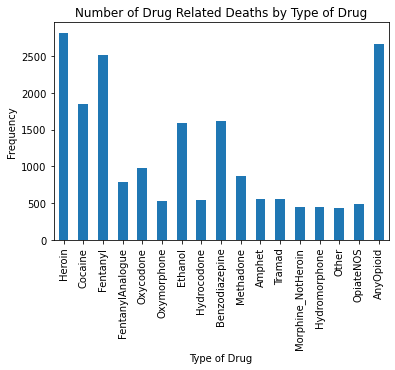

In [56]:
drug_classifications.sum(axis = 0).plot.bar()
plt.title('Number of Drug Related Deaths by Type of Drug')
plt.xlabel('Type of Drug')
plt.ylabel('Frequency')

It was not too surprising to find that the majority of drug related deaths were the result of the use of opiate drugs, such as heroin, fentanyl, fentanyl analogue, oxycodone, oxymorphone, hydrocodone, methadone, tramadol, or the catch-all label "AnyOpioid".  Drugs classified in any opiate or opioid category are chemically similar and have similar physiological and psychological effects when ingested.  Opioid drugs in particular are more deadly than many other types of drugs because there is little room for user error in the realm of dosage.  Additionally, the social and environmental conditions typically surrounding the usage of opiates are in general not conductive to a user accessing medical attention in the case of an accidental overdose, which also contributes to a large number of deaths.  Even though it makes sense that drug deaths related to opioid use would comprise a decent portion of the data, it was downright shocking to see that the frequency of all opioid drugs occuring in drug related deaths pales in comparison to three other popular and lethal drugs : cocaine, ethanol, and benzodiazepines.

Cocaine, ethanol, and benzodiazepines are in three distinct drug classification categories, so they are not significantly chemically similar to one another, and they have distinct physiological and psychological effects when ingested.  One note is that although ethanol and benzodiazepines do both cause central nervous system depressant effects, they act on different types of GABA receptors, which results in different physiological and psychological effects when ingested.  More importantly, ethanol is viewed much differently than most other psychoactive substances by the general public since ethanol is available for purchase to anyone over the legal drinking age with no need for a prescription.  Sadly, most people do not consider ethanol to be a drug and this can lead to physical injuries including death because ethanol use is not viewed in the same light as most other drug use.  With all this considered, it was very surprising to see that the data shows that even the sum of all instances of death involving cocaine, ethanol, and benzodiazepines pale in comparison to the sum of all instances of death where one or more opioid was involved.  

### Visualization 3: Visulizing the Relationship Betwen Gender, Age, and Type of Drug Found in the User's System at the Time of Death

We were interested in seeing if there was a difference in the types of drugs most frequently found in a user's system on the basis of the reported gender in the drug deaths dataset.  

Grouped the age and drug classification data based on sex (male or female) by using a split violin plot. The kernel density estimates help us see the probability that members of the population will take on the given value.  Wider sections of the plot represent a higher probability, and skinnier sections represent a lower probability.

Plotted the ages by drug classification dataset by using a horizontal violin plot.  A horizontal violin plot is better than the standard vertical bar plot for plotting many categories.

In [57]:
sex_age_drug = drug_related_deaths_geo[['Age', 'Sex']].merge(drug_classifications, left_index=True, right_index=True)
sex_age_drug

,Age,Sex,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
0,48.0,Male,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30.0,Female,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,23.0,Male,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,22.0,Male,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23.0,Male,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,43.0,Male,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
5047,21.0,Male,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5048,30.0,Male,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
5049,33.0,Male,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
sex_age_drug_dist = \
sex_age_drug[sex_age_drug.iloc[:, 2] == 1].iloc[:, 0: 2]\
            .groupby(['Sex', 'Age'], as_index=False)\
            .size()\
            .rename({'size': sex_age_drug.columns[2]}, axis=1)
for patch in range(3, 18):
    sex_age_drug_dist = sex_age_drug_dist.merge(
    sex_age_drug[sex_age_drug.iloc[:, patch] == 1].iloc[:, 0: 2]\
            .groupby(['Sex', 'Age'], as_index=False)\
            .size()\
            .rename({'size': sex_age_drug.columns[patch]}, axis=1),
    how='outer',\
    on=['Sex', 'Age']
    )

sex_age_drug_dist = sex_age_drug_dist.fillna(0)
sex_age_drug_dist.iloc[:, 1:] = sex_age_drug_dist.iloc[:, 1:].astype(int)
sex_age_drug_dist.head()

,Sex,Age,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS
0,Female,14,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Female,17,3,2,4,1,0,0,0,0,1,0,0,0,0,0,0,1
2,Female,19,7,1,5,0,0,0,1,0,2,0,0,0,0,0,0,0
3,Female,20,10,2,5,2,2,2,5,2,3,2,2,2,2,2,2,2
4,Female,21,14,9,10,3,2,2,4,2,4,2,3,3,2,2,2,2


In [59]:
sex_age_drug_dists = sex_age_drug[sex_age_drug.iloc[:, 2] == 1].iloc[:, 0: 2]
sex_age_drug_dists['Drug'] = sex_age_drug.columns[2]
sex_age_drug_dists.head()

for patch in range(3, 18):
    sex_age_drug_dist = sex_age_drug[sex_age_drug.iloc[:, patch] == 1].iloc[:, 0: 2]
    sex_age_drug_dist['Drug'] = sex_age_drug.columns[patch]
    sex_age_drug_dists = pd.concat([sex_age_drug_dists, sex_age_drug_dist])

sex_age_drug_dists.head()

,Age,Sex,Drug
1,30.0,Female,Heroin
2,23.0,Male,Heroin
4,23.0,Male,Heroin
5,21.0,Female,Heroin
7,40.0,Male,Heroin


In [60]:
sex_age_drug_dists = sex_age_drug_dists.loc[sex_age_drug_dists['Sex'] != 'Unknown', :].dropna()
sex_age_drug_dists.head()

,Age,Sex,Drug
1,30.0,Female,Heroin
2,23.0,Male,Heroin
4,23.0,Male,Heroin
5,21.0,Female,Heroin
7,40.0,Male,Heroin


#### Visualization 3a : Violin Plot

Using a violin plot allows us to clearly see differences between the genders

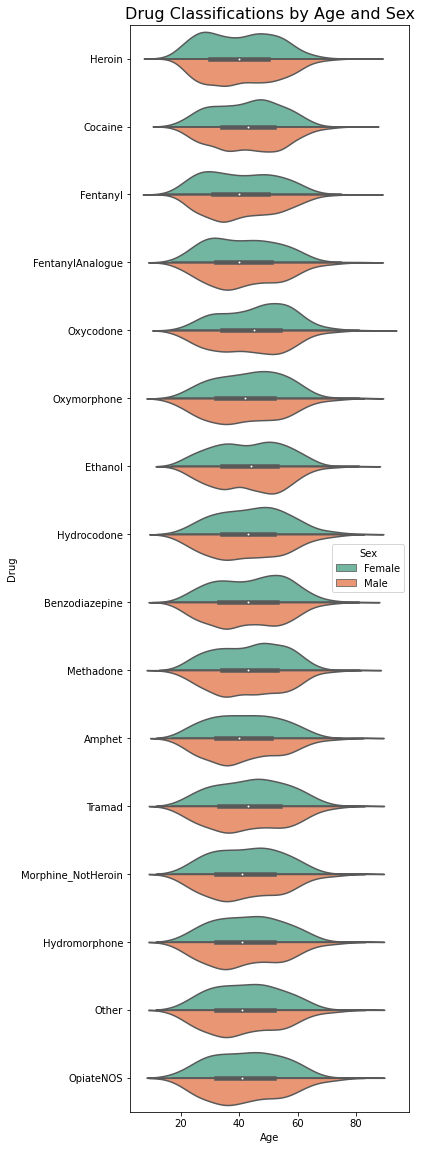

In [61]:
fig = plt.figure(figsize=(5, 20))
ax = plt.subplot(111)
sns.violinplot(data=sex_age_drug_dists, y='Drug', x='Age', hue='Sex', split=True, ax=ax, orient='h', palette="Set2")
plt.title("Drug Classifications by Age and Sex", fontsize=16);

#### Drugs By Gender:

**Drugs more Popular with Males** : heroin, amphetamine

**Drugs more Popular with Females** :   fentanyl, fentanyl_analogue, oxycodone, oxymorphone, benzodiazepine (slightly), tramadol, hydromorphone

**Drugs with Roughly equal distribution across both genders** : cocaine, ethanol, methadone, hydrocodone, morphine_NotHeroin, opiateNOS, AnyOpioid


##### 6 Notes on Gender Differences: 
Both Genders used cocaine and ethanol equally.  

Both genders used opioids frequently (methadone, hydrocodone, morphine_NotHeroin, opiateNOS, AnyOpioid)

*Trends in Females*

Although both genders use opioids, Females were more likely to use drugs that are legal with a prescription whether that was an opioid ( fentanyl, fentanyl_analogue, oxycodone, oxymorphone, tramadol, hydromorphone) or not (benzodiazepine)

*Trends in Males*

Males were more likely to use drugs that were completely illegal and/or very stimulating drugs.  

Males used the illegal opioids heroin more frequently than females 
amphetamines (stimulating and often used illegally, especially methamphetamine)


##### Notes on Legality Status of Different Drugs:
**Schedule 1 Drugs** : Drug Enforcement Agency (DEA) deems these as drugs with the Highest Addictive Potential and they are Illegal in All Circumstances

*Schedule 1 Drugs in Dataset*: Heroin 

**Schedule 2-4 Drugs** : DEA Deems there is an Addictive Potential but less than Schedule 1 drugs, and they are legal only when someone has a valid prescription

**Schedule 2 drugs in Dataset**: Fentanyl, Fentanyl_analogue, Oxycodone, Oxymorphone, Hydrocodone, Methadone, Amphetamine, Morphine, Hydromorphone, Cocaine (only with an Rx which is very rarely used for minor nose surgery and NOT in the amounts people overdose on)

**Schedule 4 drugs in Dataset**: Benzodiazepine, Tramadol

Drugs that can be of any schedule (completely illegal or not): OpioidNOS, AnyOpioid

**Unscheduled Drugs**: (Completely legal, just may be age restricted)

*Unscheduled Drugs in Dataset* : Ethanol (only age restricted)



##### Analysis:

#### Visualization 3a: Boxplot
Box plot allows us to easily see the age distribution.

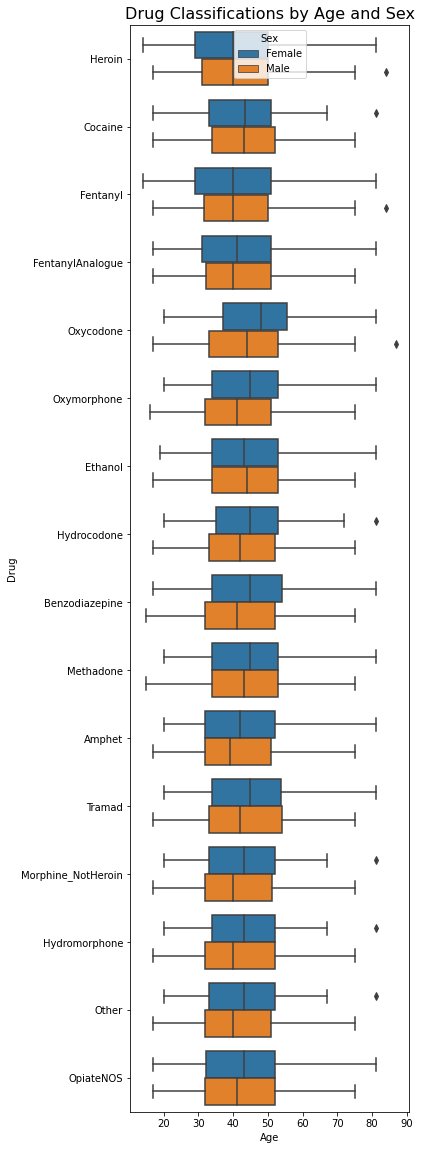

In [62]:
fig = plt.figure(figsize=(5, 20))
ax = plt.subplot(111)
sns.boxplot(data=sex_age_drug_dists, y='Drug', x='Age', hue='Sex', ax=ax, orient='h')
plt.title("Drug Classifications by Age and Sex", fontsize=16);

### Visualization 4: The Relationship Between Age, Sex, and the Frequency of Drug Related Deaths

To gain insight as to whether drug use that leads to death is more common in one gender or another and if drug use that leads to death is more frequent among certain ages, a histogram was created.  This histogram plots the frequency of deaths binned by age and separated by reported sex (male, female, or unknown).

/home/muhan-zhang/miniconda3/envs/msse-python/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


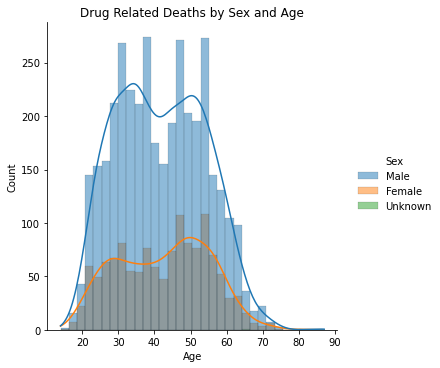

In [63]:
# Use a histogram to plot the relationship between sex and age
sns.displot(drug_related_deaths_geo, x='Age', hue='Sex', kde=True, lw=0.1)
plt.title('Drug Related Deaths by Sex and Age');

**Analysis**:

After examining the histogram, it is abundantly clear that the data indicate that there are more males that have died from drug related causes than females in this dataset. In fact, across many age categories, drug related deaths involving males are about 2.5 times more frequent than drug related deaths involving females. It was surprising to see such a large gender discrepancy in the drug related deaths.  This is an interesting initial finding that can be further expanded upon in subsequent work done on this project.

From the kernel density estimate, both distributions for Male and Female are bimodal, with similar peaks at Age = 28\~32 and Age = 50\~52. The symmetry is not obvious, and both distrubutions are weakly right-skewed.

In [64]:
drug_related_deaths_geo['Year'] = drug_related_deaths_geo['Date'].dt.year
drug_related_deaths_geo['Month'] = drug_related_deaths_geo['Date'].dt.month
drug_related_deaths_geo['DOW'] = drug_related_deaths_geo['Date'].dt.dayofweek
drug_related_deaths_geo[['Year', 'Month', 'DOW']].head()

,Year,Month,DOW
0,2013,3,3
1,2016,3,6
2,2016,3,3
3,2013,2,2
4,2014,6,6


### Visualization 5: Number of Drug Related Deaths by Year

<AxesSubplot:xlabel='Year'>

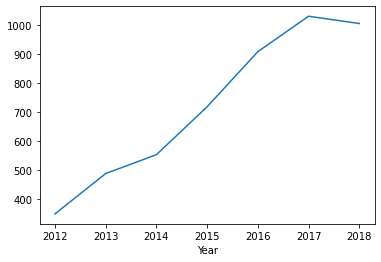

In [65]:
drug_related_deaths_geo.groupby("Year").size().plot()

**Notes**
FDA Opioid Epidemic Timeline
https://www.fda.gov/media/106638/download

2016 is when staunch regulation starts, correlates with dataset

“On February 4, FDA leaders, in response to the opioid abuse epidemic, called for a far-reaching action plan to reassess the agency’s approach to opioid medications. The plan will focus on policies aimed at reversing the epidemic, while still providing patients in pain access to effective relief.”

2017 when oxymorphone from endo international is pulled. A very popular drug.

2018 Targeting prescribers giving them more strict guidelines for writing prescriptions
	
    June 5th : Target illegal online drug sales
	
    Aug 3rd: The TIRF REMS requires that healthcare providers who prescribe TIRF medicines for outpatient use are specially certified, that pharmacies that dispense TIRF medicines for inpatient and outpatient use are specially certified, and that completion of the prescriber-patient agreement form occurs prior to dispensing TIRF medicines for outpatient use


### Visualization 6: Number of Drug Related Deaths by Month

<AxesSubplot:xlabel='Month'>

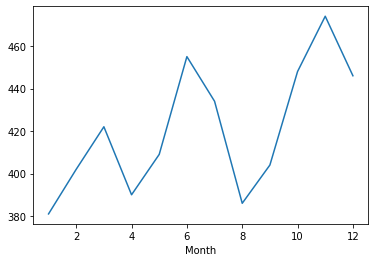

In [66]:
drug_related_deaths_geo.groupby("Month").size().plot()

**Notes**

*Small Peak in March* : Maybe correlates to spring and the changes that come with it.  
More daylight energizes people and people in the north may be depressed from Seasonal Affective Disorder, which is a depressive disorder in the winter months.  For example, there is a peak in suicides in Alaska when spring arrives because most people's moods lift quickly with sunlight and people who are still depressed when spring rolls around often feel badly they haven't gotten better like everyone else


*Medium peak in June* : Maybe correlates to summer partying.

*Largest Peak in November* : Not sure but may correlate to holiday stress (November is Thanksgiving)


### Visualization 7: Number of Drug Related Deaths by Day of Week

Sunday corresponds to a value of 0 and Saturday corresponds to a value of 6.

<AxesSubplot:xlabel='DOW'>

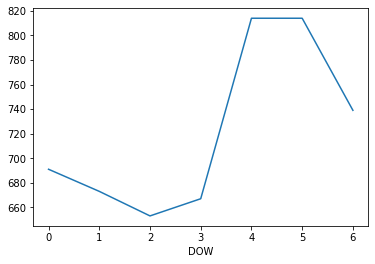

In [67]:
drug_related_deaths_geo.groupby("DOW").size().plot()

**Notes**

*Peak on Friday* : At the end of the workweek, people may want to use drugs to unwind or party now that the week's responsibilities are done.

*Peak on Thurday* : Possibly a lead up to the weekend 

*Decrease Saturday* : Maybe due to a lack of reporting on the weekends and not necessarily an absolute decrease in drug related deaths on this weekend day

*Decrease Sunday and Valley through Wednesday* : People are in the middle of the workweek

In [68]:
drug_related_deaths_geo.groupby("DOW").size()

DOW
0    691
1    673
2    653
3    667
4    814
5    814
6    739
dtype: int64

In [69]:
drug_related_deaths_geo["COD"].unique()

array(['Cocaine Intoxication', 'Acute Heroin and Cocaine Intoxication',
       'Acute Fentanyl and Morphine Intoxication', ...,
       'Acute Intoxication due to the Combined Effects of Ethanol, Diazepam, and Chlordiazepoxide',
       'Multidrug Toxicity Including Heroin, Alprazolam, and Clonazepam',
       'Multidrug Toxicity Including Heroin, Fentanyl, 4-ANPP, para-Fluoroisobutyrylfentanyl, and Tramadol'],
      dtype=object)

In [70]:
drug_related_deaths_geo.columns[20: 37]

Index(['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone',
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other',
       'OpiateNOS', 'AnyOpioid'],
      dtype='object')

In [71]:
drug_time = drug_related_deaths_geo.melt(id_vars=['Year', 'Month', 'DOW'],
                                         value_vars=drug_related_deaths_geo.columns[20: 37],
                                         var_name='Drug')\
                                   .dropna(subset=['value'])\
                                   .replace({'value': drug_ohe})
drug_time.head()

,Year,Month,DOW,Drug,value
1,2016,3,6,Heroin,1
2,2016,3,3,Heroin,1
4,2014,6,6,Heroin,1
5,2012,8,6,Heroin,1
7,2012,4,2,Heroin,1


In [72]:
drug_time.loc[drug_time["Drug"] == "Other", "value"] = 1
drug_time["value"].unique()

array([1, 0], dtype=object)

### Visualization 8: Drug Deaths by Drug Classification Over the Years 2012-2018

<AxesSubplot:xlabel='Year', ylabel='value'>

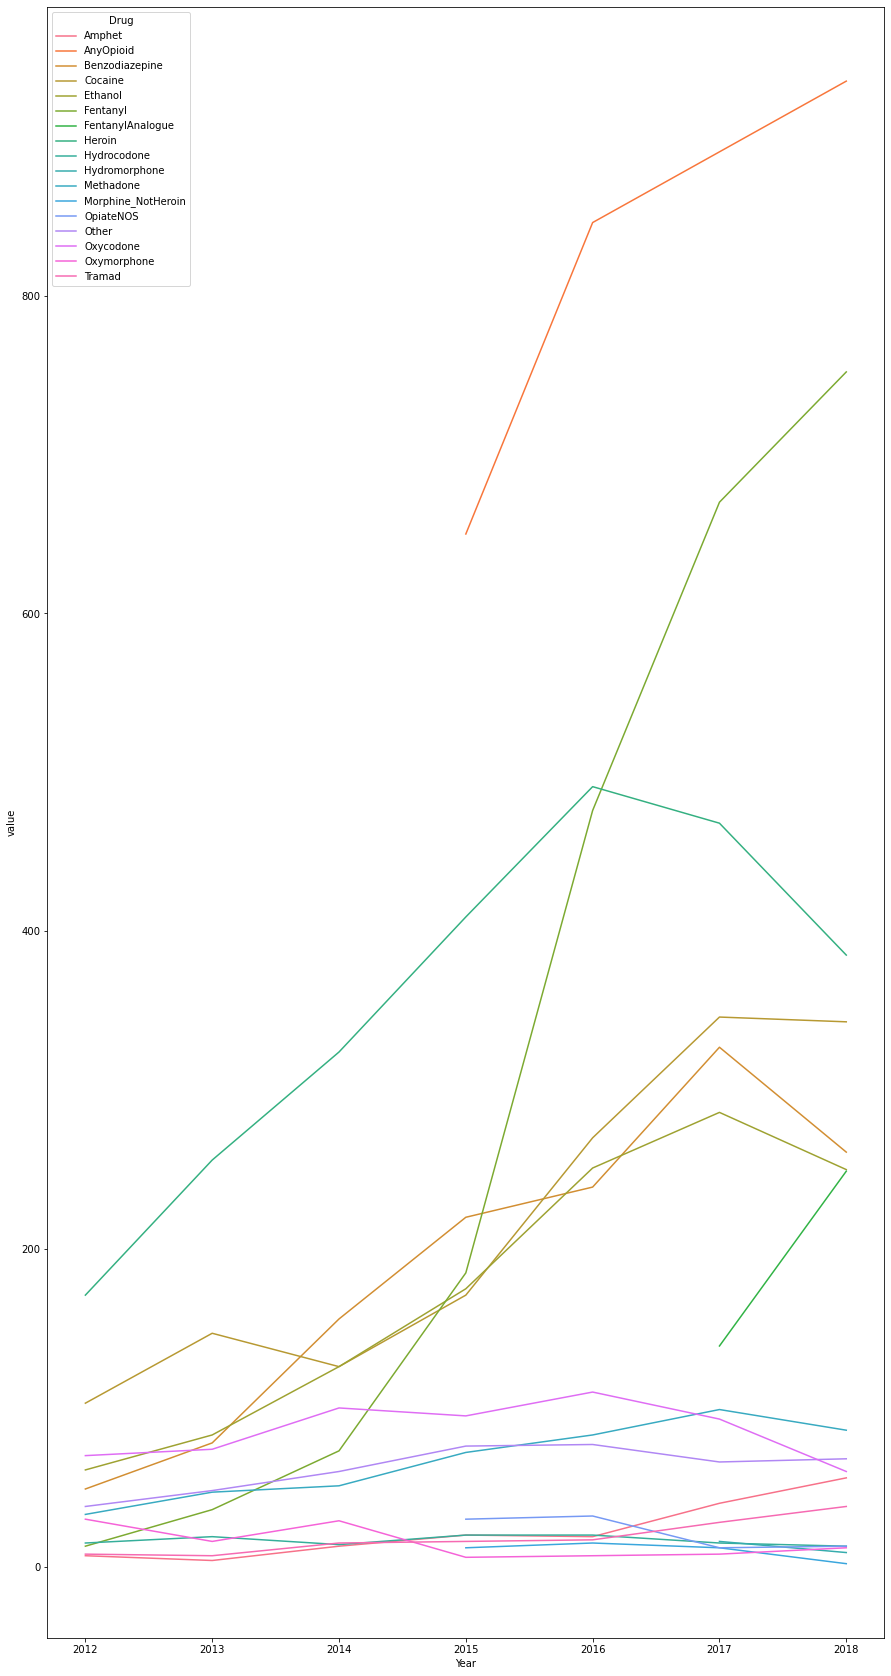

In [73]:
plt.figure(figsize=(15, 30))
sns.lineplot(data=drug_time[['Year', 'Drug', 'value']].groupby(['Drug', 'Year'], as_index=False).sum(), x='Year', y='value', hue='Drug')

**Notes**:
    
*7 Most Noteworthy Drugs* we discussed would be best to evaluate based off the line plot of number of drug related deaths by year (where the colors correspond to different drug types): Fentanyl, Heroin, Cocaine, AnyOpioid, benzodiazepine, Ethanol, Fetanyl_Anologue

Note: Keep Ethanol, Cocaine, and benzodiazepine if possible because it would help correspond with our barplot analysis from **Visualization 2**


In [74]:
drug_time[['Year', 'Drug', 'value']].groupby(['Drug', 'Year'], as_index=False).sum().query("Drug == 'Heroin'")

,Drug,Year,value
40,Heroin,2012,171
41,Heroin,2013,256
42,Heroin,2014,324
43,Heroin,2015,409
44,Heroin,2016,491
45,Heroin,2017,468
46,Heroin,2018,385


<AxesSubplot:xlabel='Year'>

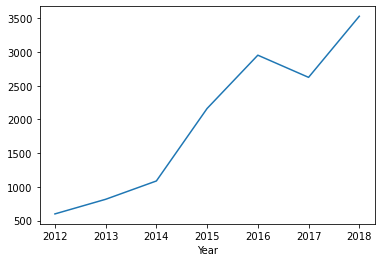

In [75]:
drug_time.groupby("Year").size().plot()

In [76]:
temp = drug_related_deaths_geo.iloc[:, 20: 37].replace(drug_ohe)

In [77]:
temp.loc[temp["Other"] != 0, "Other"] = 1

In [78]:
temp["Other"].unique()

array([0, 1], dtype=object)

In [79]:
np.linalg.matrix_rank(temp.values.astype(int))

17

In [80]:
temp.values

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]], dtype=object)

In [81]:
drug_related_deaths_geo

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,MannerofDeath,DeathCityGeoLat,DeathCityGeoLog,ResidenceCityGeoLat,ResidenceCityGeoLog,InjuryCityGeoLat,InjuryCityGeoLog,Year,Month,DOW
0,13-0102,2013-03-21,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,Accident,41.118050,-73.412906,41.118050,-73.412906,41.575155,-72.738288,2013,3,3
1,16-0165,2016-03-13,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,Accident,41.393666,-73.451539,41.419998,-73.282501,NaN,NaN,2016,3,6
2,16-0208,2016-03-31,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,Accident,41.026526,-73.628549,NaN,NaN,NaN,NaN,2016,3,3
3,13-0052,2013-02-13,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,Accident,41.026526,-73.628549,NaN,NaN,41.575155,-72.738288,2013,2,2
4,14-0277,2014-06-29,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,BRISTOL,...,Accident,41.673037,-72.945791,41.673037,-72.945791,41.575155,-72.738288,2014,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5046,15-0466,2015-09-08,DateReported,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,CHESHIRE,...,Accident,41.498834,-72.901448,41.498834,-72.901448,41.575155,-72.738288,2015,9,1
5047,17-0618,2017-07-22,DateReported,21.0,Male,White,MADISON,NEW HAVEN,CT,NEW HAVEN,...,Accident,41.308252,-72.924161,41.271447,-72.600860,41.575155,-72.738288,2017,7,5
5048,18-0646,2018-08-14,DateofDeath,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,DANBURY,...,Accident,41.393666,-73.451539,NaN,NaN,41.393666,-73.451539,2018,8,1
5049,14-0124,2014-03-16,DateofDeath,33.0,Male,White,HARTFORD,NaN,NaN,WINDSOR,...,Accident,41.852781,-72.643790,41.765775,-72.673356,41.575155,-72.738288,2014,3,6


## Step 4 : Modeling

### Educational Attainment

In [82]:
ea_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Town                    122400 non-null  object 
 1   FIPS                    122400 non-null  int64  
 2   Year                    122400 non-null  object 
 3   Gender                  122400 non-null  object 
 4   Educational Attainment  122400 non-null  object 
 5   Measure Type            122400 non-null  object 
 6   Variable                122400 non-null  object 
 7   Value                   122400 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 7.5+ MB


In [83]:
ea_ct = ea_ct.query("Gender == 'Total'").drop("Gender", axis=1)\
             .query("`Measure Type` == 'Number'").drop("Measure Type", axis=1)\
             .query("Variable == 'Educational Attainment'").drop("Variable", axis=1)\
             .drop("FIPS", axis=1)\
             .query("Year == '2012-2016' or Year == '2013-2017' or Year == '2014-2018'")\
             .query("Town != 'Connecticut'")\
             .reset_index(drop=True)

ea_ct["Town"] = ea_ct["Town"].str.upper()
ea_ct.head()

,Town,Year,Educational Attainment,Value
0,ANDOVER,2012-2016,Associate's Degree,281.0
1,ANDOVER,2012-2016,Bachelor's Degree or higher,933.0
2,ANDOVER,2012-2016,"High School Diploma, GED, or equivalent",476.0
3,ANDOVER,2012-2016,Less than High School Diploma,46.0
4,ANDOVER,2012-2016,Some College,487.0


In [84]:
ea_enc = {i: j for i, j in zip(ea_ct["Educational Attainment"].unique(), [3, 4, 1, 0, 2, 5])}
ea_enc

{"Associate's Degree": 3,
 "Bachelor's Degree or higher": 4,
 'High School Diploma, GED, or equivalent': 1,
 'Less than High School Diploma': 0,
 'Some College': 2,
 'Total': 5}

In [85]:
ea_ct = ea_ct.replace({"Educational Attainment": ea_enc})\
             .merge(mnc_ct, on='Town', how='left')\
             .groupby(["County", "Year", "Educational Attainment"], as_index=False)\
             .sum()
ea_ct.head()

,County,Year,Educational Attainment,Value
0,FAIRFIELD,2012-2016,0,64298.0
1,FAIRFIELD,2012-2016,1,142289.0
2,FAIRFIELD,2012-2016,2,96734.0
3,FAIRFIELD,2012-2016,3,38024.0
4,FAIRFIELD,2012-2016,4,295047.0


In [86]:
ea_total = ea_ct.query("`Educational Attainment` == 5").drop("Educational Attainment", axis=1).copy()
ea_total

,County,Year,Value
5,FAIRFIELD,2012-2016,636392.0
11,FAIRFIELD,2013-2017,642401.0
17,FAIRFIELD,2014-2018,641790.0
23,HARTFORD,2012-2016,619328.0
29,HARTFORD,2013-2017,622863.0
...,...,...,...
119,TOLLAND,2013-2017,95679.0
125,TOLLAND,2014-2018,95870.0
131,WINDHAM,2012-2016,80577.0
137,WINDHAM,2013-2017,80756.0


In [87]:
ea_ct = ea_ct.merge(ea_total, how='left', on=["County", "Year"])\
             .groupby(["County", "Educational Attainment"], as_index=False)\
             .sum()

ea_ct["Avg"] = ea_ct['Value_x'] / ea_ct['Value_y']

ea_ct = ea_ct.drop(["Value_x", "Value_y"], axis=1)\
             .query("`Educational Attainment` != 5")\
             .pivot(index='County', columns='Educational Attainment', values='Avg')\
             .rename(lambda x: 'EA=' + str(x), axis=1)

ea_ct.columns.rename(None, inplace=True)
ea_ct.head()

,EA=0,EA=1,EA=2,EA=3,EA=4
County,,,,,
FAIRFIELD,0.102747,0.219901,0.149251,0.060815,0.467286
HARTFORD,0.106087,0.270791,0.170020,0.079836,0.373266
LITCHFIELD,0.079040,0.294034,0.186788,0.093227,0.346910
MIDDLESEX,0.059959,0.268442,0.169496,0.091420,0.410683
NEW HAVEN,0.101632,0.306183,0.172649,0.073427,0.346109


### Racial Identity

In [88]:
drug_related_deaths_geo["Race"].unique()

array(['Black', 'White', 'Asian, Other', 'Hispanic, White', nan,
       'Asian Indian', 'Hispanic, Black', 'Unknown', 'Other', 'Chinese',
       'Native American, Other', 'Hawaiian'], dtype=object)

In [89]:
np.sort(ri_ct["Race/Ethnicity"].unique())

array(['American Indian and Alaska Native Alone', 'Asian Alone',
       'Black or African American Alone',
       'Hispanic or Latino (of any race)',
       'Native Hawaiian and Other Pacific Islander Alone',
       'Some Other Race Alone', 'Two or More Races', 'White Alone'],
      dtype=object)

In [90]:
ri_enc = {i: j for i, j in zip(np.sort(ri_ct["Race/Ethnicity"].unique()), range(len(ri_ct["Race/Ethnicity"].unique())))}
ri_enc

{'American Indian and Alaska Native Alone': 0,
 'Asian Alone': 1,
 'Black or African American Alone': 2,
 'Hispanic or Latino (of any race)': 3,
 'Native Hawaiian and Other Pacific Islander Alone': 4,
 'Some Other Race Alone': 5,
 'Two or More Races': 6,
 'White Alone': 7}

In [91]:
drd_ri_enc = {i: j for i, j in zip(drug_related_deaths_geo["Race"].dropna().unique(), [2, 7, 1, 3, 1, 3, np.nan, 5, 1, 0, 4])}
drd_ri_enc

{'Black': 2,
 'White': 7,
 'Asian, Other': 1,
 'Hispanic, White': 3,
 'Asian Indian': 1,
 'Hispanic, Black': 3,
 'Unknown': nan,
 'Other': 5,
 'Chinese': 1,
 'Native American, Other': 0,
 'Hawaiian': 4}

In [92]:
pop_ct = ri_ct.query("`Measure Type` == 'Number'").drop("Measure Type", axis=1)\
              .query("Variable == 'Population'").drop("Variable", axis=1)\
              .drop("FIPS", axis=1)\
              .query("Year == '2008-2012'"
                     " or Year == '2009-2013'"
                     " or Year == '2010-2014'"
                     " or Year == '2011-2015'"
                     " or Year == '2012-2016'"
                     " or Year == '2013-2017'"
                     " or Year == '2014-2018'")\
              .query("County != 'Connecticut'")

pop_ct["County"] = pop_ct["County"].str.upper()\
                                   .str.rsplit(' ', n=1, expand=True)\
                                   .loc[:, 0]

pop_ct["Year"] = pop_ct["Year"].str.split('-', expand=True)\
                               .loc[:, 1]\
                               .astype(int)

pop_ct = pop_ct.groupby(["County", "Year"], as_index=False).sum()
pop_ct.head(10)

,County,Year,Value
0,FAIRFIELD,2012,918892.0
1,FAIRFIELD,2013,926233.0
2,FAIRFIELD,2014,934215.0
3,FAIRFIELD,2015,939983.0
4,FAIRFIELD,2016,941618.0
5,FAIRFIELD,2017,947328.0
6,FAIRFIELD,2018,944348.0
7,HARTFORD,2012,893504.0
8,HARTFORD,2013,895827.0
9,HARTFORD,2014,897374.0


In [93]:
ri_ct = ri_ct.query("`Measure Type` == 'Number'").drop("Measure Type", axis=1)\
             .query("Variable == 'Population'").drop("Variable", axis=1)\
             .drop("FIPS", axis=1)\
             .query("Year == '2012-2016' or Year == '2013-2017' or Year == '2014-2018'")\
             .query("County != 'Connecticut'")\
             .replace({"Race/Ethnicity": ri_enc})\
             .reset_index(drop=True)

ri_ct["County"] = ri_ct["County"].str.upper()\
                                 .str.rsplit(' ', n=1, expand=True)\
                                 .loc[:, 0]
ri_ct.head()

,County,Year,Race/Ethnicity,Value
0,FAIRFIELD,2012-2016,0,1326.0
1,FAIRFIELD,2012-2016,1,47323.0
2,FAIRFIELD,2012-2016,2,98457.0
3,FAIRFIELD,2012-2016,3,175480.0
4,FAIRFIELD,2012-2016,4,298.0


In [94]:
ri_total = ri_ct.groupby(["County", "Year"], as_index=False).agg({'Value': 'sum'})
ri_total.head()

,County,Year,Value
0,FAIRFIELD,2012-2016,941618.0
1,FAIRFIELD,2013-2017,947328.0
2,FAIRFIELD,2014-2018,944348.0
3,HARTFORD,2012-2016,895699.0
4,HARTFORD,2013-2017,897417.0


In [95]:
ri_ct = ri_ct.merge(ri_total, how='left', on=["County", "Year"])\
             .groupby(["County", "Race/Ethnicity"], as_index=False)\
             .sum()

ri_ct["Ratio RI"] = ri_ct['Value_x'] / ri_ct['Value_y']

ri_ct = ri_ct.drop(["Value_x", "Value_y"], axis=1)\
             .rename({'Race/Ethnicity': 'Race'}, axis=1)

ri_ct.head(10)

,County,Race,Ratio RI
0,FAIRFIELD,0,0.001396
1,FAIRFIELD,1,0.051219
2,FAIRFIELD,2,0.104754
3,FAIRFIELD,3,0.190066
4,FAIRFIELD,4,0.000310
5,FAIRFIELD,5,0.005749
6,FAIRFIELD,6,0.017445
7,FAIRFIELD,7,0.629061
8,HARTFORD,0,0.001402
9,HARTFORD,1,0.050146


### Income Brackets `ib` (Median Household Income)

In [96]:
ib_ct.head(10)

,County,FIPS,Year,Race/Ethnicity,Measure Type,Variable,Value
0,Connecticut,9,2005-2009,All,Number,Median Household Income,67721.00
1,Connecticut,9,2005-2009,All,Number,Margins of Error,389.00
2,Connecticut,9,2005-2009,All,Ratio to State Median,Median Household Income,1.00
3,Connecticut,9,2005-2009,All,Ratio to State Median,Margins of Error,0.01
4,Connecticut,9,2005-2009,American Indian and Alaska Native Alone,Number,Median Household Income,45615.00
5,Connecticut,9,2005-2009,American Indian and Alaska Native Alone,Number,Margins of Error,6184.00
6,Connecticut,9,2005-2009,American Indian and Alaska Native Alone,Ratio to State Median,Median Household Income,1.00
7,Connecticut,9,2005-2009,American Indian and Alaska Native Alone,Ratio to State Median,Margins of Error,0.19
8,Connecticut,9,2005-2009,Asian Alone,Number,Median Household Income,82212.00
9,Connecticut,9,2005-2009,Asian Alone,Number,Margins of Error,2608.00


In [97]:
ib_ct["Race/Ethnicity"].unique()

array(['All', 'American Indian and Alaska Native Alone', 'Asian Alone',
       'Black or African American Alone', 'Hispanic or Latino',
       'Native Hawaiian and Other Pacific Islander',
       'Some Other Race Alone', 'Two or More Races', 'White Alone',
       'White Alone Not Hispanic or Latino'], dtype=object)

In [98]:
ib_ri_enc = {i: j for i, j in zip(ib_ct["Race/Ethnicity"].unique(), [8, 0, 1, 2, 3, 4, 5, 6, 7, 7])}
ib_ri_enc

{'All': 8,
 'American Indian and Alaska Native Alone': 0,
 'Asian Alone': 1,
 'Black or African American Alone': 2,
 'Hispanic or Latino': 3,
 'Native Hawaiian and Other Pacific Islander': 4,
 'Some Other Race Alone': 5,
 'Two or More Races': 6,
 'White Alone': 7,
 'White Alone Not Hispanic or Latino': 7}

In [99]:
ib_ct = ib_ct.query("Variable == 'Median Household Income'").drop("Variable", axis=1)\
             .drop("FIPS", axis=1)\
             .query("Year == '2012-2016' or Year == '2013-2017' or Year == '2014-2018'")\
             .query("County != 'Connecticut'")\
             .query("`Race/Ethnicity` != 'All'")\
             .replace({"Race/Ethnicity": ib_ri_enc})\
             .reset_index(drop=True)

ib_ct["County"] = ib_ct["County"].str.upper()\
                                 .str.rsplit(' ', n=1, expand=True)\
                                 .loc[:, 0]
ib_ct.head(10)

,County,Year,Race/Ethnicity,Measure Type,Value
0,FAIRFIELD,2012-2016,0,Number,51250.00
1,FAIRFIELD,2012-2016,0,Ratio to State Median,1.14
2,FAIRFIELD,2012-2016,1,Number,114438.00
3,FAIRFIELD,2012-2016,1,Ratio to State Median,1.25
4,FAIRFIELD,2012-2016,2,Number,46587.00
5,FAIRFIELD,2012-2016,2,Ratio to State Median,1.07
6,FAIRFIELD,2012-2016,3,Number,51208.00
7,FAIRFIELD,2012-2016,3,Ratio to State Median,1.22
8,FAIRFIELD,2012-2016,4,Number,47438.00
9,FAIRFIELD,2012-2016,4,Ratio to State Median,0.94


In [100]:
ib_ct_num = ib_ct.query("`Measure Type` == 'Number'")\
                 .drop("Measure Type", axis=1)\
                 .rename({"Value": "Number"}, axis=1)\
                 .copy()
ib_ct_rat = ib_ct.query("`Measure Type` == 'Ratio to State Median'")\
                 .drop("Measure Type", axis=1)\
                 .rename({"Value": "Ratio"}, axis=1)\
                 .copy()

display(ib_ct_num)
display(ib_ct_rat)

,County,Year,Race/Ethnicity,Number
0,FAIRFIELD,2012-2016,0,51250.0
2,FAIRFIELD,2012-2016,1,114438.0
4,FAIRFIELD,2012-2016,2,46587.0
6,FAIRFIELD,2012-2016,3,51208.0
8,FAIRFIELD,2012-2016,4,47438.0
...,...,...,...,...
422,WINDHAM,2014-2018,4,-9999.0
424,WINDHAM,2014-2018,5,30526.0
426,WINDHAM,2014-2018,6,49929.0
428,WINDHAM,2014-2018,7,67160.0


,County,Year,Race/Ethnicity,Ratio
1,FAIRFIELD,2012-2016,0,1.14
3,FAIRFIELD,2012-2016,1,1.25
5,FAIRFIELD,2012-2016,2,1.07
7,FAIRFIELD,2012-2016,3,1.22
9,FAIRFIELD,2012-2016,4,0.94
...,...,...,...,...
423,WINDHAM,2014-2018,4,-9999.00
425,WINDHAM,2014-2018,5,0.77
427,WINDHAM,2014-2018,6,0.86
429,WINDHAM,2014-2018,7,0.81


In [101]:
ib_ct = ib_ct_num.merge(ib_ct_rat, how='outer', on=["County", "Year", "Race/Ethnicity"])\
                 .replace({"Number": {-9999.0 : np.nan}, "Ratio": {-9999.0: np.nan}})\
                 .dropna()

ib_ct["NR"] = ib_ct["Number"] * ib_ct["Ratio"]

ib_ct = ib_ct.groupby(["County", "Race/Ethnicity"], as_index=False).agg({'Number': sum, 'NR': sum})

ib_ct["IB"] = ib_ct["NR"] / ib_ct["Number"]

ib_ct = ib_ct.drop(["Number", "NR"], axis=1)\
             .pivot(index='County', columns='Race/Ethnicity', values='IB')\
             .fillna(method='ffill')\
             .reset_index()\
             .melt(id_vars='County', value_name='IB')\
             .rename({'Race/Ethnicity': 'Race'}, axis=1)

ib_ct.head(10)

,County,Race,IB
0,FAIRFIELD,0,1.209488
1,HARTFORD,0,0.818242
2,LITCHFIELD,0,3.580000
3,MIDDLESEX,0,1.549926
4,NEW HAVEN,0,0.967807
5,NEW LONDON,0,1.241481
6,TOLLAND,0,1.241481
7,WINDHAM,0,1.020000
8,FAIRFIELD,1,1.270349
9,HARTFORD,1,0.959968


### Modeling

In [102]:
drd_model = drug_related_deaths_geo[["Race", "DeathCounty", "Year"]]\
                                   .copy()\
                                   .merge(drug_classifications[["Fentanyl", 
                                                                "Heroin",
                                                                "Cocaine"]], left_index=True, right_index=True)\
                                   .rename({"DeathCounty": "County"}, axis=1)\
                                   .replace({'Race': drd_ri_enc})\
                                   .dropna()\
                                   .groupby(["Race", "County", "Year"], as_index=False)

drd_model = pd.concat([drd_model.sum(), drd_model.size()['size']], axis=1)

drd_model["Race"] = drd_model["Race"].astype(int)

drd_model

,Race,County,Year,Fentanyl,Heroin,Cocaine,size
0,0,NEW LONDON,2013,0,0,0,1
1,1,FAIRFIELD,2013,1,0,0,1
2,1,FAIRFIELD,2016,3,4,0,4
3,1,FAIRFIELD,2017,1,1,0,1
4,1,FAIRFIELD,2018,1,0,1,1
...,...,...,...,...,...,...,...
170,7,WINDHAM,2014,7,13,6,20
171,7,WINDHAM,2015,8,16,5,26
172,7,WINDHAM,2016,13,10,3,20
173,7,WINDHAM,2017,25,19,18,34


In [103]:
drd_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Race      175 non-null    int64 
 1   County    175 non-null    object
 2   Year      175 non-null    int64 
 3   Fentanyl  175 non-null    int64 
 4   Heroin    175 non-null    int64 
 5   Cocaine   175 non-null    int64 
 6   size      175 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 10.9+ KB


In [104]:
county_to_ea = ea_ct.apply(lambda x: np.average(range(5), weights=x), axis=1)\
                    .to_dict()
county_to_ea

{'FAIRFIELD': 2.569992028462191,
 'HARTFORD': 2.3434051775224884,
 'LITCHFIELD': 2.3349329492939823,
 'MIDDLESEX': 2.524426271862328,
 'NEW HAVEN': 2.25619692455367,
 'NEW LONDON': 2.2760531503894335,
 'TOLLAND': 2.4995416185918105,
 'WINDHAM': 2.0142333627712343}

In [105]:
drd_model = drd_model.merge(ri_ct, on=['County', 'Race'])\
                     .merge(ib_ct, on=['County', 'Race'])\
                     .merge(pop_ct, on=['County', 'Year'])\
                     .replace({'County': county_to_ea})\
                     .rename({'County': 'County EA', 'Value': 'Population'}, axis=1)

drd_model['RI'] = drd_model['Population'] * drd_model['Ratio RI']
drd_model = drd_model.iloc[:, [1, 2, 3, 4, 5, 8, 10, 6]]

drd_model.head()

,County EA,Year,Fentanyl,Heroin,Cocaine,IB,RI,size
0,2.276053,2013,0,0,0,1.241481,1218.686549,1
1,2.276053,2013,0,1,0,1.023533,14350.717913,1
2,2.276053,2013,2,4,4,0.976539,27571.221396,6
3,2.276053,2013,5,32,15,0.899897,208831.682190,47
4,2.569992,2013,1,0,0,1.270349,47440.896260,1


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train, test = train_test_split(drd_model, test_size=0.25)

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_train_std

array([[ 8.86049066e-03, -1.58881321e+00,  4.48019348e-02,
         1.27534822e+00,  8.00477403e-01, -2.71592763e-01,
         2.37251643e+00],
       [ 9.44663938e-01, -1.02137992e-01, -1.95451716e-01,
        -2.44823837e-01, -2.67127640e-01, -1.37953492e-02,
        -5.52216425e-02],
       [-3.94813749e-01, -5.97696398e-01, -4.35705366e-01,
        -5.78520142e-01, -5.63684597e-01,  5.32309989e-03,
        -7.08841747e-01],
       [ 8.86049066e-03,  3.93420414e-01, -4.70027316e-01,
        -6.15597509e-01, -6.22995988e-01, -3.33739307e-01,
        -5.35846959e-01],
       [ 1.36690833e+00,  1.38453723e+00,  7.91238849e-02,
        -1.70669102e-01,  2.94293163e-02,  2.71836138e-01,
        -2.30178828e-01],
       [ 1.36690833e+00, -1.02137992e-01, -2.98417566e-01,
        -3.18978571e-01, -3.26439032e-01,  8.21009776e-01,
         2.21086025e-01],
       [ 9.44663938e-01, -5.97696398e-01, -1.61129766e-01,
        -5.94370008e-02, -2.67127640e-01, -1.37953492e-02,
        -5.3756307

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

def cross_validate_rmse(model):
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X_train_std):
        model.fit(X_train_std[tr_ind], y_train.iloc[tr_ind])
        rmse_values.append(rmse(y_train.iloc[va_ind], model.predict(X_train_std[va_ind])))
    return np.mean(rmse_values)

In [108]:
model = LinearRegression()
cross_validate_rmse(model)

5.469979158157535

In [109]:
model.score(X_train_std, y_train)

0.9932581926907479

In [110]:
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]
X_test_std = scaler.transform(X_test)

In [111]:
model.score(X_test_std, y_test)

0.9895901859398921

In [112]:
model.coef_

array([-0.75855808, -0.4516572 , 10.60187098, 19.4212256 , 15.97533413,
        0.08349609,  3.7914388 ])

In [113]:
model.intercept_

29.106455036565453